In [ ]:
# !pip install -q kaggle

In [ ]:
# from google.colab import files
# files.upload()

In [ ]:
# !mkdir ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# !kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

In [ ]:
# !mkdir dep_data
# !unzip reviews.zip -d dep_data

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
# !cp /content/dep_data/reviews.csv /content/drive/MyDrive/Datasets/Depression

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from bs4 import BeautifulSoup
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
nltk.download("stopwords")
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/Datasets/Depression/noiseless.csv").drop(["Unnamed: 0"], axis=1)
df2 = pd.read_csv("/content/drive/MyDrive/Datasets/Depression/lemm.csv").drop(["Unnamed: 0"], axis=1)

In [ ]:
df1.iloc[0,0]

'one reviewers mentioned watching 1 oz episode hooked right exactly happened me the first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use word it called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home many aryans muslims gangstas latinos christians italians irish scuffles death stares dodgy dealings shady agreements never far away i would say main appeal show due fact goes shows dare forget pretty pictures painted mainstream audiences forget charm forget romance oz mess around first episode ever saw struck nasty surreal say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards sold nickel inmates kill order get away well mannered middle class inmates turned prison bitches due lac

In [ ]:
df2.iloc[0,0]


'one reviewer mention watch 1 oz episode hook right exactly happen me the first thing strike oz brutality unflinching scene violence set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use word it call oz nickname give oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inwards privacy high agenda em city home many aryan muslim gangstas latinos christian italian irish scuffle death stare dodgy dealing shady agreement never far away i would say main appeal show due fact go show dare forget pretty picture paint mainstream audience forget charm forget romance oz mess around first episode ever saw struck nasty surreal say ready watch developed taste oz get accustomed high level graphic violence violence injustice crook guard sell nickel inmate kill order get away well mannered middle class inmate turn prison bitch due lack street skill prison experience watch oz may beco

In [ ]:
# dataset["sentiment"] = LabelEncoder().fit_transform(dataset["sentiment"])

In [ ]:
# dataset.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [ ]:
# dataset["sentiment"].value_counts()

1    25000
0    25000
Name: sentiment, dtype: int64

In [ ]:
# df = dataset.copy(deep=True)

In [ ]:
# df["review"] = df["review"].apply(lambda x: x.lower())

In [ ]:
import re

tokenizer = ToktokTokenizer()
stopwords = nltk.corpus.stopwords.words("english")

def remove_noise(review):
    soup = BeautifulSoup(review, "html.parser")
    review = soup.get_text()

    review = re.sub("\[[^]]*\]", " ", review)

    tokens = tokenizer.tokenize(review)
    tokens = [token.strip() for token in tokens]
    tokens = [token for token in tokens if token not in stopwords]
    review = " ".join(tokens)

    pattern = r"[^a-zA-Z0-9\s}]"
    review = re.sub(pattern, " ", review)
    review = " ".join(review.split())
    return review

NameError: ignored

In [ ]:
# df["review"] = df["review"].apply(remove_noise)

In [ ]:
def pos_tagger(nltk_tag):
    if nltk_tag.startswith("J"):
        return wordnet.ADJ
    elif nltk_tag.startswith("V"):
        return wordnet.VERB
    elif nltk_tag.startswith("N"):
        return wordnet.NOUN
    elif nltk_tag.startswith("R"):
        return wordnet.ADV
    else:         
        return None

In [ ]:
def lemmatizer(review):
    lemmatizer = WordNetLemmatizer()
    pos_tagged = nltk.pos_tag(nltk.word_tokenize(review))
    wordnet_tagged = list(map(lambda x: (x[0], pos_tagger(x[1])), pos_tagged))
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            lemmatized_sentence.append(word)
        else:       
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))

    review = " ".join(lemmatized_sentence)
    return review

In [ ]:
# df3["review"] = df3["review"].apply(lemmatizer)

In [ ]:
X, y = df2.iloc[:, :-1], df2.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
X_train = np.squeeze(X_train, axis=1)

In [ ]:
X_train.shape

(40000,)

In [ ]:
X_test = np.squeeze(X_test, axis=1)

In [ ]:
y_train = np.expand_dims(y_train, axis=-1)
y_test = np.expand_dims(y_test, axis=-1)

In [ ]:
vectorizer = TfidfVectorizer(ngram_range=(1,2), min_df = 0)

In [ ]:
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [ ]:
X_train_vec.shape

(40000, 2421419)

In [ ]:
def evaluate_model(model):
    y_pred = model.predict(X_test_vec)
    print(classification_report(y_test, y_pred))
    
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = [round(value, 2) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.83      0.92      0.87      5035
           1       0.91      0.81      0.86      4965

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



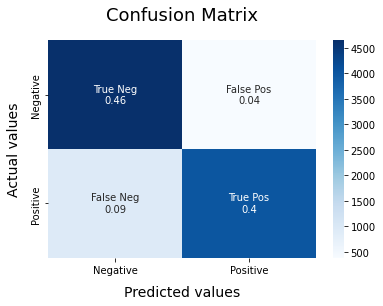

In [ ]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB(alpha=2)
bnb.fit(X_train_vec, y_train)
evaluate_model(bnb)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.90      0.87      0.89      5035
           1       0.87      0.91      0.89      4965

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



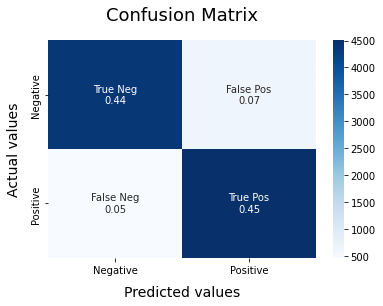

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(X_train_vec, y_train)
evaluate_model(sgd)

In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_vec, y_train.squeeze())
evaluate_model(svc)

In [ ]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit()